In [304]:
import numpy as np
np.random.seed(42)
import sklearn
import os
import helper
import keras
import pickle
import math
from keras.layers.advanced_activations import LeakyReLU 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from skimage import exposure

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
import matplotlib.pyplot as plt
import random
import statistics
%matplotlib inline
import pandas as pd

from tqdm import tqdm


import random
import csv
from tensorflow.contrib.layers import flatten
from skimage import transform as transf
from prettytable import PrettyTable
%matplotlib inline

SEED = 22

In [305]:
X_train, y_train, X_valid, y_valid, X_test, y_test = helper.load_data()
print("data loaded")



data loaded


In [306]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of validation examples.
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# The shape of an traffic sign image
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.bincount(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of validation examples = 12630
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [307]:
X_train_p = helper.preprocess_gry(X_train)
X_test_p = helper.preprocess_gry(X_test)
X_valid_p = helper.preprocess_gry(X_valid)



C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\skimage\exposure\exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


In [309]:
print(X_train_p.shape)


(39209, 32, 32, 1)


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 249.04it/s]


There are 2 images in the  dataset


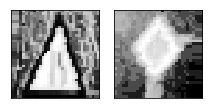

In [310]:
import matplotlib
matplotlib.rcParams['font.size'] = 8

def adaptive_equalize(data):
    #print(data.shape)
    ae = []
    for i in tqdm(range(len(data))):
        #print(i)
    
        img = exposure.equalize_adapthist(data[i].squeeze(), clip_limit=0.03)
        img = np.expand_dims(img, axis=2)
        #print(img.shape)
        ae.append(np.asarray(img))
    #print(len(d))
    return ae

def contrast_stretch(data):
    #print(data.shape)
  
    cs = []
    for i in tqdm(range(len(data))):
        #print(i)
        p2, p98 = np.percentile(data[i], (2,98))

        img = exposure.rescale_intensity(data[i].squeeze(), in_range=(p2, p98))
        img = np.expand_dims(img, axis=2)
        #print(img.shape)
        cs.append(np.asarray(img))
    #print(len(d))
    return cs

#print(X_aug.squeeze().shape)
a = contrast_stretch(np.asarray([img_d,img_b]))
helper.plot_images(-1,a,2,"")


In [311]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    fill_mode='nearest',
   # horizontal_flip=True,
)

In [312]:
import os
import numpy as np
from tqdm import tqdm
from sklearn.utils import shuffle

def data_augment(X,y):

    
    img_shape = [X.shape[1], X.shape[2], X.shape[3]]
    img_shape.insert(0,0)
    
    data_shape = np.asarray(img_shape)
    total_image_per_class = 1000
    
    X_augmented =X_contrast_stretch= X_adaptive_equalize=np.empty(data_shape)
    
    
    #print(type(X_augmented))
    #print(X_augmented.shape)
    y_augmented = y_contrast_stretch=y_adaptive_equalize=np.empty(0,dtype='uint8')
    


    print('Augmenting Data...')
    for i in tqdm(range(n_classes)):
    #for i in tqdm(range(3)):
            #print(i)
            index = [y==i]
            images_for_i_class = X[y==i]
            #plot_image(images_for_i_class[0],1,1,0,"")
            y_i_class = y[y==i]
            #print(i)
            #print(len(images_for_i_class))
            #print(len(y_i_class))

            #print("____")
            #X_augmented_i = np.ndarray((, 32, 32, 1), dtype=np.uint8)
            #X_augmented_i = np.copy(images_for_i_class)
            #y_augmented_i = np.copy(y_i_class)
            #print(len(X_augmented_i))
            X_augmented_i = np.empty(data_shape)
            #print(X_augmented_i.shape)
            y_augmented_i = np.empty(0,dtype='uint8')
            for X_b,y_b in datagen.flow(images_for_i_class, y_i_class, batch_size=len(y_i_class), seed=9345+i*37):            
                #print(X_b.shape)
                X_augmented_i = np.append(X_augmented_i, X_b, axis=0)
                #print(len(X))
                #print(len(X_augmented_i))
                #print(X_augmented_i.shape)
                #plot_images(i,X[:4],4,"")
                
                y_augmented_i = np.append(y_augmented_i, y_b, axis=0)

                if len(X_augmented_i) >= total_image_per_class:
                    #print("break")
                    break
            X_augmented_i, y_augmented_i = shuffle(X_augmented_i, y_augmented_i, random_state=9345)
            #print(X_augmented.shape)
            X_augmented = np.append(X_augmented, X_augmented_i[:100], axis=0)
            y_augmented = np.append(y_augmented, y_augmented_i[:100], axis=0)     

            X_contrast_stretch = np.append(X_contrast_stretch, X_augmented_i[150:250], axis=0)
            y_contrast_stretch = np.append(y_contrast_stretch, y_augmented_i[150:250], axis=0) 
            
            X_adaptive_equalize = np.append(X_adaptive_equalize, X_augmented_i[350:450], axis=0)
            y_adaptive_equalize = np.append(y_adaptive_equalize, y_augmented_i[350:450], axis=0)     


            #print(len(X_augmented))
    print("Applying Contrast Stretch and Adaptive Equalize operations on random augmented data")
    X_contrast_stretch = contrast_stretch(X_contrast_stretch)
    X_adaptive_equalize = adaptive_equalize(X_adaptive_equalize)
    
    X_augmented = np.append(X_augmented, X_contrast_stretch, axis=0)
    y_augmented = np.append(y_augmented, y_contrast_stretch, axis=0)
    
    X_augmented = np.append(X_augmented, X_adaptive_equalize, axis=0)
    y_augmented = np.append(y_augmented, y_adaptive_equalize, axis=0)  
    
    X_augmented, y_augmented = shuffle(X_augmented, y_augmented, random_state=9345)
  

        
    
    return X_augmented, y_augmented
    
    # Storing for checkpoint2
    #X_augmented = X_augmented.astype('float32')


In [314]:
X_aug, y_aug  = data_augment(X_train_p, y_train)

Augmenting Data...


100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [00:10<00:00,  3.99it/s]


Applying Contrast Stretch and Adaptive Equalize operations on random augmented data


  0%|                                                                                         | 0/4300 [00:00<?, ?it/s]C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
100%|██████████████████████████████████████████████████████████████████████████████| 4300/4300 [00:43<00:00, 98.13it/s]


In [316]:


X_aug  = np.append(X_aug, X_train_p, axis=0)
y_aug  = np.append(y_aug,y_train , axis=0)



In [317]:
print(X_aug.shape)
print(y_aug.shape)

(52109, 32, 32, 1)
(52109,)


There are 100 images in the  dataset


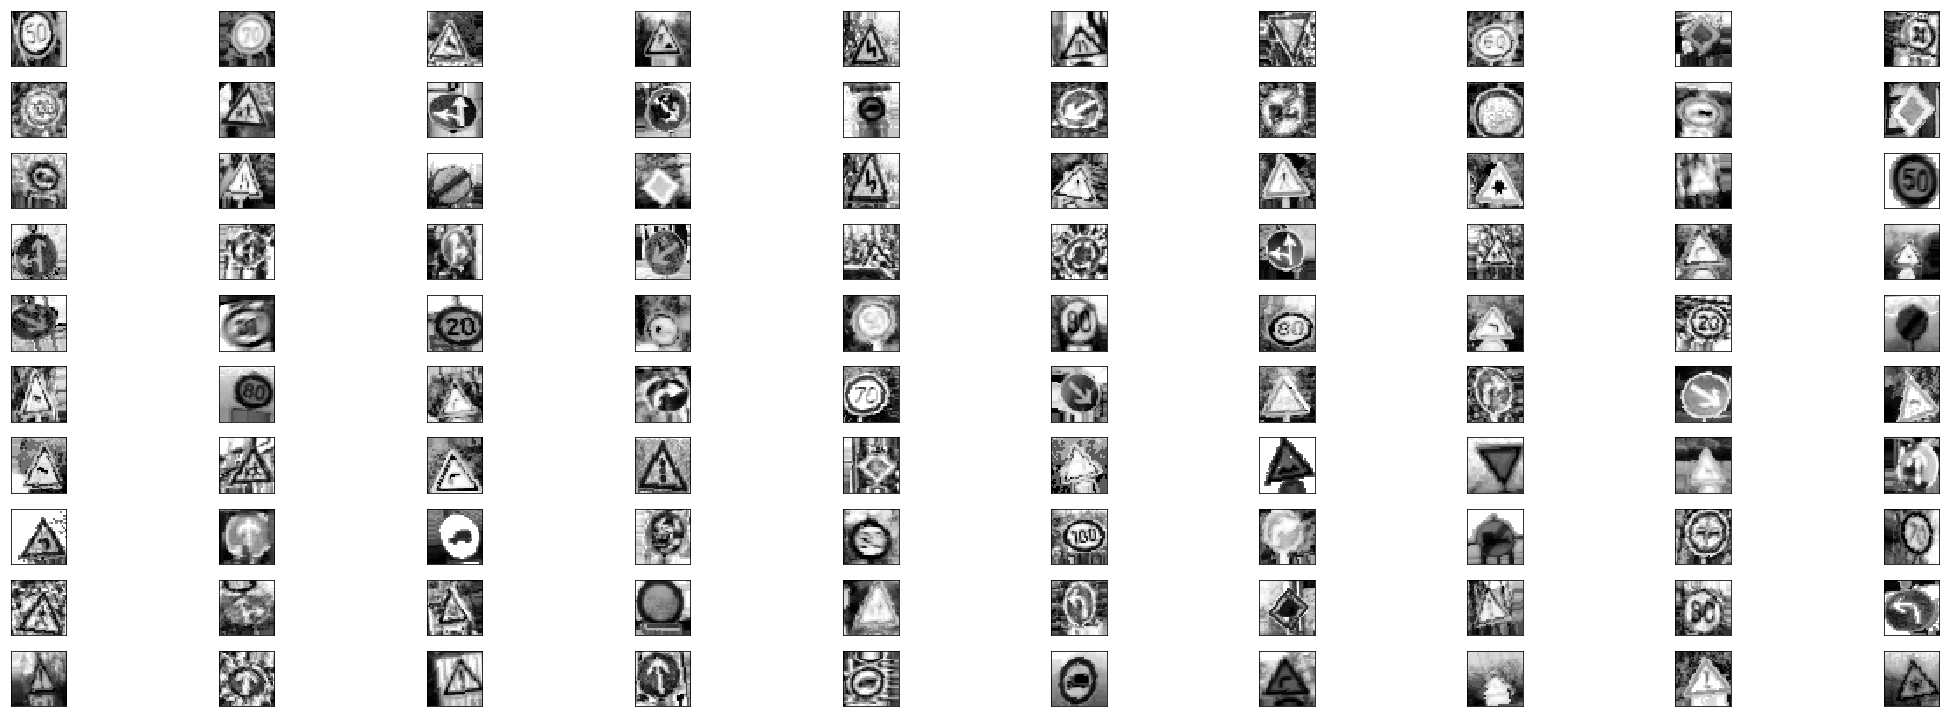

In [280]:
helper.plot_images(-1, X_aug[:100],10,"")

In [318]:
# X_aug is already shuffled. Shuffle other sets.

X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_train_p, y_train_p = shuffle(X_train, y_train, random_state=42)

X_test, y_test= shuffle(X_test, y_test, random_state=42)
X_valid, y_valid = shuffle(X_valid, y_valid, random_state = 42)


#one-hot-encoding
y_train = np_utils.to_categorical(y_train,num_classes=43)
y_test = np_utils.to_categorical(y_test, num_classes=43)
y_valid = np_utils.to_categorical(y_valid, num_classes=43)
#y_aug = np_utils.to_categorical(y_aug, num_classes=43)


In [320]:
y_aug = np_utils.to_categorical(y_aug, num_classes=43)
print(y_aug.shape)
print(y_train.shape)

(52109, 43)
(39209, 43)


In [321]:
from keras.layers.core import Layer
import tensorflow as tf

class SpatialTransformer(Layer):
    """Spatial Transformer Layer
    Implements a spatial transformer layer as described in [1]_.
    Borrowed from [2]_:
    downsample_fator : float
        A value of 1 will keep the orignal size of the image.
        Values larger than 1 will down sample the image. Values below 1 will
        upsample the image.
        example image: height= 100, width = 200
        downsample_factor = 2
        output image will then be 50, 100
    References
    ----------
    .. [1]  Spatial Transformer Networks
            Max Jaderberg, Karen Simonyan, Andrew Zisserman, Koray Kavukcuoglu
            Submitted on 5 Jun 2015
    .. [2]  https://github.com/skaae/transformer_network/blob/master/transformerlayer.py
    .. [3]  https://github.com/EderSantana/seya/blob/keras1/seya/layers/attention.py
    """

    def __init__(self,
                 localization_net,
                 output_size,
                 **kwargs):
        self.locnet = localization_net
        self.output_size = output_size
        super(SpatialTransformer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.locnet.build(input_shape)
        self.trainable_weights = self.locnet.trainable_weights
        #self.regularizers = self.locnet.regularizers //NOT sure ABOUT THIS, THERE IS NO MORE SUCH PARAMETR AT self.locnet
        #self.constraints = self.locnet.constraints

    def compute_output_shape(self, input_shape):
        output_size = self.output_size
        return (None,
                int(output_size[0]),
                int(output_size[1]),
                int(input_shape[-1]))

    def call(self, X, mask=None):
        affine_transformation = self.locnet.call(X)
        output = self._transform(affine_transformation, X, self.output_size)
        return output

    def _repeat(self, x, num_repeats):
        ones = tf.ones((1, num_repeats), dtype='int32')
        x = tf.reshape(x, shape=(-1,1))
        x = tf.matmul(x, ones)
        return tf.reshape(x, [-1])

    def _interpolate(self, image, x, y, output_size):
        batch_size = tf.shape(image)[0]
        height = tf.shape(image)[1]
        width = tf.shape(image)[2]
        num_channels = tf.shape(image)[3]

        x = tf.cast(x , dtype='float32')
        y = tf.cast(y , dtype='float32')

        height_float = tf.cast(height, dtype='float32')
        width_float = tf.cast(width, dtype='float32')

        output_height = output_size[0]
        output_width  = output_size[1]

        x = .5*(x + 1.0)*(width_float)
        y = .5*(y + 1.0)*(height_float)

        x0 = tf.cast(tf.floor(x), 'int32')
        x1 = x0 + 1
        y0 = tf.cast(tf.floor(y), 'int32')
        y1 = y0 + 1

        max_y = tf.cast(height - 1, dtype='int32')
        max_x = tf.cast(width - 1,  dtype='int32')
        zero = tf.zeros([], dtype='int32')

        x0 = tf.clip_by_value(x0, zero, max_x)
        x1 = tf.clip_by_value(x1, zero, max_x)
        y0 = tf.clip_by_value(y0, zero, max_y)
        y1 = tf.clip_by_value(y1, zero, max_y)

        flat_image_dimensions = width*height
        pixels_batch = tf.range(batch_size)*flat_image_dimensions
        flat_output_dimensions = output_height*output_width
        base = self._repeat(pixels_batch, flat_output_dimensions)
        base_y0 = base + y0*width
        base_y1 = base + y1*width
        indices_a = base_y0 + x0
        indices_b = base_y1 + x0
        indices_c = base_y0 + x1
        indices_d = base_y1 + x1

        flat_image = tf.reshape(image, shape=(-1, num_channels))
        flat_image = tf.cast(flat_image, dtype='float32')
        pixel_values_a = tf.gather(flat_image, indices_a)
        pixel_values_b = tf.gather(flat_image, indices_b)
        pixel_values_c = tf.gather(flat_image, indices_c)
        pixel_values_d = tf.gather(flat_image, indices_d)

        x0 = tf.cast(x0, 'float32')
        x1 = tf.cast(x1, 'float32')
        y0 = tf.cast(y0, 'float32')
        y1 = tf.cast(y1, 'float32')

        area_a = tf.expand_dims(((x1 - x) * (y1 - y)), 1)
        area_b = tf.expand_dims(((x1 - x) * (y - y0)), 1)
        area_c = tf.expand_dims(((x - x0) * (y1 - y)), 1)
        area_d = tf.expand_dims(((x - x0) * (y - y0)), 1)
        output = tf.add_n([area_a*pixel_values_a,
                           area_b*pixel_values_b,
                           area_c*pixel_values_c,
                           area_d*pixel_values_d])
        return output

    def _meshgrid(self, height, width):
        x_linspace = tf.linspace(-1., 1., width)
        y_linspace = tf.linspace(-1., 1., height)
        x_coordinates, y_coordinates = tf.meshgrid(x_linspace, y_linspace)
        x_coordinates = tf.reshape(x_coordinates, [-1])
        y_coordinates = tf.reshape(y_coordinates, [-1])
        ones = tf.ones_like(x_coordinates)
        indices_grid = tf.concat([x_coordinates, y_coordinates, ones], 0)
        return indices_grid

    def _transform(self, affine_transformation, input_shape, output_size):
        batch_size = tf.shape(input_shape)[0]
        height = tf.shape(input_shape)[1]
        width = tf.shape(input_shape)[2]
        num_channels = tf.shape(input_shape)[3]

        affine_transformation = tf.reshape(affine_transformation, shape=(batch_size,2,3))

        affine_transformation = tf.reshape(affine_transformation, (-1, 2, 3))
        affine_transformation = tf.cast(affine_transformation, 'float32')

        width = tf.cast(width, dtype='float32')
        height = tf.cast(height, dtype='float32')
        output_height = output_size[0]
        output_width = output_size[1]
        indices_grid = self._meshgrid(output_height, output_width)
        indices_grid = tf.expand_dims(indices_grid, 0)
        indices_grid = tf.reshape(indices_grid, [-1]) # flatten?

        indices_grid = tf.tile(indices_grid, tf.stack([batch_size]))
        indices_grid = tf.reshape(indices_grid, (batch_size, 3, -1))

        transformed_grid = tf.matmul(affine_transformation, indices_grid)
        x_s = tf.slice(transformed_grid, [0, 0, 0], [-1, 1, -1])
        y_s = tf.slice(transformed_grid, [0, 1, 0], [-1, 1, -1])
        x_s_flatten = tf.reshape(x_s, [-1])
        y_s_flatten = tf.reshape(y_s, [-1])

        transformed_image = self._interpolate(input_shape,
                                                x_s_flatten,
                                                y_s_flatten,
                                                output_size)

        transformed_image = tf.reshape(transformed_image, shape=(batch_size,
                                                                output_height,
                                                                output_width,
                                                                num_channels))
        return transformed_image


In [322]:
def locnet():

    # initial weights
    b = np.zeros((2, 3), dtype='float32')
    b[0, 0] = 1
    b[1, 1] = 1
    W = np.zeros((50, 6), dtype='float32')
    weights = [W, b.flatten()]

    input_shape = (32,32,1)

    #locnet
    locnet = Sequential()
    locnet.add(MaxPooling2D(pool_size=(2,2), input_shape=input_shape))
    locnet.add(Conv2D(20, (5, 5)))
    locnet.add(MaxPooling2D(pool_size=(2,2)))
    locnet.add(Conv2D(20, (5, 5)))

    locnet.add(Flatten())
    locnet.add(Dense(50))
    locnet.add(LeakyReLU(alpha=0.5))
    locnet.add(Dense(6, weights=weights))
    return locnet
    #locnet.add(Activation('sigmoid'))
    

In [323]:
def cnn_model(flag_BN=False, flag_STN=False):


    model = Sequential()
    if flag_STN == True:
        lnet = locnet()
        print(lnet)
        model.add(SpatialTransformer(localization_net=lnet,
                            input_shape=(32,32,1),output_size=(32,32)))
    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=( 32, 32,1)))                    
    #model.add(Conv2D(32, (3, 3), activation='relu'))
    if flag_BN == True:
        model.add(BatchNormalization())
        
    model.add(LeakyReLU(alpha=0.5))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), padding='same'))

    #model.add(Conv2D(64, (3, 3), activation='relu'))
    if flag_BN == True:
        model.add(BatchNormalization())  
    model.add(LeakyReLU(alpha=0.5))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3, 3), padding='same'))
    #model.add(Conv2D(128, (3, 3), activation='relu'))
    if flag_BN == True:
        model.add(BatchNormalization())  
    model.add(LeakyReLU(alpha=0.5))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(1024))
    if flag_BN == True:
        model.add(BatchNormalization())  
    model.add(LeakyReLU(alpha=0.5))
    model.add(Dropout(0.5))
    model.add(Dense(43, activation='softmax'))
    
    
    #print(model.get_config())
    
    model.summary()

    return model

In [ ]:
print(X_aug.shape)
print(y_aug.shape)
model = cnn_model(flag_BN=True)
# Compile and train the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(X_aug, y_aug,
                    batch_size=512, nb_epoch=20,
                    verbose=1, validation_data=(X_valid_p, y_valid))

(52109, 32, 32, 1)
(52109, 43)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_17 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_18 (Batc (None, 16, 16, 6

C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 52109 samples, validate on 12630 samples
Epoch 1/20
52109/52109 [==============================] - ETA: 561s - loss: 4.8795 - acc: 0.035 - ETA: 469s - loss: 4.6222 - acc: 0.038 - ETA: 442s - loss: 4.4150 - acc: 0.063 - ETA: 429s - loss: 4.2899 - acc: 0.083 - ETA: 428s - loss: 4.1754 - acc: 0.098 - ETA: 419s - loss: 4.0282 - acc: 0.112 - ETA: 411s - loss: 3.9077 - acc: 0.128 - ETA: 404s - loss: 3.8100 - acc: 0.143 - ETA: 397s - loss: 3.7221 - acc: 0.156 - ETA: 391s - loss: 3.6333 - acc: 0.168 - ETA: 386s - loss: 3.5560 - acc: 0.181 - ETA: 383s - loss: 3.4740 - acc: 0.193 - ETA: 379s - loss: 3.4064 - acc: 0.205 - ETA: 374s - loss: 3.3476 - acc: 0.214 - ETA: 369s - loss: 3.2958 - acc: 0.223 - ETA: 364s - loss: 3.2449 - acc: 0.233 - ETA: 360s - loss: 3.1867 - acc: 0.242 - ETA: 359s - loss: 3.1301 - acc: 0.250 - ETA: 357s - loss: 3.0880 - acc: 0.257 - ETA: 354s - loss: 3.0390 - acc: 0.266 - ETA: 352s - loss: 2.9947 - acc: 0.274 - ETA: 349s - loss: 2.9532 - acc: 0.281 - ETA: 344s - 

52109/52109 [==============================] - ETA: 428s - loss: 0.8732 - acc: 0.730 - ETA: 422s - loss: 0.8491 - acc: 0.734 - ETA: 431s - loss: 0.8092 - acc: 0.749 - ETA: 433s - loss: 0.8300 - acc: 0.744 - ETA: 426s - loss: 0.8206 - acc: 0.744 - ETA: 420s - loss: 0.8397 - acc: 0.738 - ETA: 413s - loss: 0.8297 - acc: 0.739 - ETA: 408s - loss: 0.8388 - acc: 0.737 - ETA: 403s - loss: 0.8325 - acc: 0.738 - ETA: 401s - loss: 0.8486 - acc: 0.736 - ETA: 399s - loss: 0.8475 - acc: 0.735 - ETA: 394s - loss: 0.8380 - acc: 0.738 - ETA: 389s - loss: 0.8315 - acc: 0.741 - ETA: 384s - loss: 0.8277 - acc: 0.743 - ETA: 379s - loss: 0.8245 - acc: 0.744 - ETA: 374s - loss: 0.8206 - acc: 0.746 - ETA: 370s - loss: 0.8191 - acc: 0.745 - ETA: 367s - loss: 0.8172 - acc: 0.747 - ETA: 362s - loss: 0.8118 - acc: 0.748 - ETA: 357s - loss: 0.8114 - acc: 0.749 - ETA: 353s - loss: 0.8074 - acc: 0.749 - ETA: 348s - loss: 0.8080 - acc: 0.750 - ETA: 343s - loss: 0.8039 - acc: 0.752 - ETA: 340s - loss: 0.8022 - acc: 0

52109/52109 [==============================] - ETA: 442s - loss: 0.3907 - acc: 0.880 - ETA: 438s - loss: 0.4588 - acc: 0.862 - ETA: 429s - loss: 0.4869 - acc: 0.856 - ETA: 419s - loss: 0.4962 - acc: 0.854 - ETA: 429s - loss: 0.4986 - acc: 0.852 - ETA: 422s - loss: 0.4891 - acc: 0.854 - ETA: 415s - loss: 0.5081 - acc: 0.847 - ETA: 408s - loss: 0.5120 - acc: 0.846 - ETA: 402s - loss: 0.5084 - acc: 0.847 - ETA: 395s - loss: 0.5150 - acc: 0.845 - ETA: 391s - loss: 0.5067 - acc: 0.847 - ETA: 390s - loss: 0.4959 - acc: 0.850 - ETA: 387s - loss: 0.4912 - acc: 0.850 - ETA: 382s - loss: 0.4902 - acc: 0.851 - ETA: 377s - loss: 0.4910 - acc: 0.851 - ETA: 372s - loss: 0.4936 - acc: 0.850 - ETA: 367s - loss: 0.4924 - acc: 0.851 - ETA: 362s - loss: 0.4925 - acc: 0.851 - ETA: 360s - loss: 0.4958 - acc: 0.849 - ETA: 356s - loss: 0.4959 - acc: 0.849 - ETA: 351s - loss: 0.4960 - acc: 0.849 - ETA: 346s - loss: 0.4956 - acc: 0.848 - ETA: 341s - loss: 0.4960 - acc: 0.848 - ETA: 337s - loss: 0.4925 - acc: 0

52109/52109 [==============================] - ETA: 432s - loss: 0.4754 - acc: 0.847 - ETA: 429s - loss: 0.4228 - acc: 0.864 - ETA: 447s - loss: 0.4129 - acc: 0.869 - ETA: 461s - loss: 0.4048 - acc: 0.875 - ETA: 457s - loss: 0.3845 - acc: 0.878 - ETA: 453s - loss: 0.3881 - acc: 0.877 - ETA: 454s - loss: 0.3838 - acc: 0.877 - ETA: 446s - loss: 0.3856 - acc: 0.878 - ETA: 438s - loss: 0.3822 - acc: 0.878 - ETA: 436s - loss: 0.3823 - acc: 0.879 - ETA: 428s - loss: 0.3898 - acc: 0.877 - ETA: 421s - loss: 0.3849 - acc: 0.878 - ETA: 414s - loss: 0.3813 - acc: 0.879 - ETA: 409s - loss: 0.3860 - acc: 0.878 - ETA: 406s - loss: 0.3812 - acc: 0.879 - ETA: 402s - loss: 0.3808 - acc: 0.880 - ETA: 397s - loss: 0.3785 - acc: 0.880 - ETA: 390s - loss: 0.3803 - acc: 0.879 - ETA: 384s - loss: 0.3775 - acc: 0.880 - ETA: 378s - loss: 0.3751 - acc: 0.880 - ETA: 371s - loss: 0.3750 - acc: 0.881 - ETA: 365s - loss: 0.3757 - acc: 0.881 - ETA: 360s - loss: 0.3743 - acc: 0.880 - ETA: 355s - loss: 0.3731 - acc: 0

52109/52109 [==============================] - ETA: 461s - loss: 0.3083 - acc: 0.908 - ETA: 453s - loss: 0.2994 - acc: 0.916 - ETA: 455s - loss: 0.2978 - acc: 0.914 - ETA: 447s - loss: 0.2964 - acc: 0.912 - ETA: 434s - loss: 0.2978 - acc: 0.908 - ETA: 428s - loss: 0.2966 - acc: 0.908 - ETA: 424s - loss: 0.2925 - acc: 0.907 - ETA: 417s - loss: 0.2883 - acc: 0.909 - ETA: 413s - loss: 0.2899 - acc: 0.908 - ETA: 406s - loss: 0.2915 - acc: 0.908 - ETA: 400s - loss: 0.2959 - acc: 0.906 - ETA: 394s - loss: 0.2969 - acc: 0.906 - ETA: 388s - loss: 0.2944 - acc: 0.906 - ETA: 387s - loss: 0.2927 - acc: 0.907 - ETA: 384s - loss: 0.2909 - acc: 0.907 - ETA: 379s - loss: 0.2912 - acc: 0.907 - ETA: 373s - loss: 0.2907 - acc: 0.908 - ETA: 367s - loss: 0.2880 - acc: 0.909 - ETA: 363s - loss: 0.2902 - acc: 0.908 - ETA: 358s - loss: 0.2915 - acc: 0.907 - ETA: 356s - loss: 0.2918 - acc: 0.907 - ETA: 351s - loss: 0.2893 - acc: 0.907 - ETA: 347s - loss: 0.2876 - acc: 0.908 - ETA: 345s - loss: 0.2886 - acc: 0

52109/52109 [==============================] - ETA: 434s - loss: 0.2753 - acc: 0.916 - ETA: 432s - loss: 0.2602 - acc: 0.918 - ETA: 437s - loss: 0.2523 - acc: 0.921 - ETA: 450s - loss: 0.2442 - acc: 0.922 - ETA: 450s - loss: 0.2452 - acc: 0.921 - ETA: 445s - loss: 0.2377 - acc: 0.923 - ETA: 438s - loss: 0.2299 - acc: 0.926 - ETA: 431s - loss: 0.2315 - acc: 0.926 - ETA: 426s - loss: 0.2308 - acc: 0.925 - ETA: 424s - loss: 0.2256 - acc: 0.927 - ETA: 423s - loss: 0.2307 - acc: 0.925 - ETA: 423s - loss: 0.2318 - acc: 0.925 - ETA: 421s - loss: 0.2321 - acc: 0.925 - ETA: 420s - loss: 0.2313 - acc: 0.925 - ETA: 415s - loss: 0.2303 - acc: 0.927 - ETA: 412s - loss: 0.2314 - acc: 0.926 - ETA: 411s - loss: 0.2361 - acc: 0.926 - ETA: 407s - loss: 0.2350 - acc: 0.927 - ETA: 403s - loss: 0.2347 - acc: 0.927 - ETA: 400s - loss: 0.2352 - acc: 0.927 - ETA: 394s - loss: 0.2342 - acc: 0.928 - ETA: 390s - loss: 0.2343 - acc: 0.928 - ETA: 387s - loss: 0.2337 - acc: 0.928 - ETA: 381s - loss: 0.2320 - acc: 0

52109/52109 [==============================] - ETA: 494s - loss: 0.2071 - acc: 0.937 - ETA: 494s - loss: 0.2175 - acc: 0.927 - ETA: 510s - loss: 0.2077 - acc: 0.929 - ETA: 503s - loss: 0.1950 - acc: 0.936 - ETA: 499s - loss: 0.1937 - acc: 0.936 - ETA: 487s - loss: 0.1890 - acc: 0.939 - ETA: 478s - loss: 0.1943 - acc: 0.937 - ETA: 476s - loss: 0.1936 - acc: 0.938 - ETA: 475s - loss: 0.1943 - acc: 0.938 - ETA: 469s - loss: 0.1957 - acc: 0.938 - ETA: 462s - loss: 0.1950 - acc: 0.939 - ETA: 454s - loss: 0.1974 - acc: 0.937 - ETA: 448s - loss: 0.1987 - acc: 0.937 - ETA: 440s - loss: 0.2010 - acc: 0.936 - ETA: 434s - loss: 0.2029 - acc: 0.936 - ETA: 427s - loss: 0.2020 - acc: 0.937 - ETA: 419s - loss: 0.2028 - acc: 0.936 - ETA: 411s - loss: 0.2022 - acc: 0.936 - ETA: 406s - loss: 0.2010 - acc: 0.937 - ETA: 399s - loss: 0.2008 - acc: 0.937 - ETA: 392s - loss: 0.1989 - acc: 0.938 - ETA: 388s - loss: 0.1980 - acc: 0.938 - ETA: 383s - loss: 0.1982 - acc: 0.938 - ETA: 377s - loss: 0.2003 - acc: 0

52109/52109 [==============================] - ETA: 419s - loss: 0.1750 - acc: 0.949 - ETA: 477s - loss: 0.1508 - acc: 0.959 - ETA: 460s - loss: 0.1654 - acc: 0.949 - ETA: 447s - loss: 0.1677 - acc: 0.948 - ETA: 445s - loss: 0.1661 - acc: 0.950 - ETA: 454s - loss: 0.1630 - acc: 0.952 - ETA: 455s - loss: 0.1626 - acc: 0.950 - ETA: 445s - loss: 0.1631 - acc: 0.950 - ETA: 443s - loss: 0.1626 - acc: 0.950 - ETA: 439s - loss: 0.1652 - acc: 0.948 - ETA: 435s - loss: 0.1651 - acc: 0.948 - ETA: 433s - loss: 0.1669 - acc: 0.948 - ETA: 427s - loss: 0.1671 - acc: 0.947 - ETA: 425s - loss: 0.1669 - acc: 0.948 - ETA: 417s - loss: 0.1654 - acc: 0.948 - ETA: 413s - loss: 0.1652 - acc: 0.948 - ETA: 408s - loss: 0.1646 - acc: 0.948 - ETA: 404s - loss: 0.1659 - acc: 0.947 - ETA: 399s - loss: 0.1659 - acc: 0.948 - ETA: 394s - loss: 0.1673 - acc: 0.948 - ETA: 388s - loss: 0.1661 - acc: 0.948 - ETA: 383s - loss: 0.1644 - acc: 0.948 - ETA: 377s - loss: 0.1661 - acc: 0.947 - ETA: 372s - loss: 0.1657 - acc: 0

52109/52109 [==============================] - ETA: 492s - loss: 0.2156 - acc: 0.943 - ETA: 477s - loss: 0.1722 - acc: 0.948 - ETA: 455s - loss: 0.1658 - acc: 0.949 - ETA: 442s - loss: 0.1682 - acc: 0.945 - ETA: 433s - loss: 0.1619 - acc: 0.946 - ETA: 426s - loss: 0.1589 - acc: 0.949 - ETA: 426s - loss: 0.1557 - acc: 0.949 - ETA: 433s - loss: 0.1519 - acc: 0.952 - ETA: 430s - loss: 0.1500 - acc: 0.952 - ETA: 430s - loss: 0.1499 - acc: 0.953 - ETA: 423s - loss: 0.1499 - acc: 0.953 - ETA: 421s - loss: 0.1502 - acc: 0.952 - ETA: 419s - loss: 0.1485 - acc: 0.952 - ETA: 415s - loss: 0.1517 - acc: 0.952 - ETA: 413s - loss: 0.1509 - acc: 0.952 - ETA: 408s - loss: 0.1540 - acc: 0.951 - ETA: 402s - loss: 0.1533 - acc: 0.952 - ETA: 397s - loss: 0.1522 - acc: 0.952 - ETA: 391s - loss: 0.1531 - acc: 0.952 - ETA: 385s - loss: 0.1515 - acc: 0.953 - ETA: 382s - loss: 0.1510 - acc: 0.952 - ETA: 377s - loss: 0.1503 - acc: 0.952 - ETA: 371s - loss: 0.1495 - acc: 0.952 - ETA: 366s - loss: 0.1496 - acc: 0

52109/52109 [==============================] - ETA: 490s - loss: 0.1094 - acc: 0.966 - ETA: 477s - loss: 0.1259 - acc: 0.960 - ETA: 465s - loss: 0.1110 - acc: 0.966 - ETA: 457s - loss: 0.1196 - acc: 0.963 - ETA: 444s - loss: 0.1248 - acc: 0.960 - ETA: 434s - loss: 0.1224 - acc: 0.960 - ETA: 427s - loss: 0.1252 - acc: 0.959 - ETA: 420s - loss: 0.1239 - acc: 0.958 - ETA: 414s - loss: 0.1258 - acc: 0.957 - ETA: 410s - loss: 0.1263 - acc: 0.956 - ETA: 407s - loss: 0.1299 - acc: 0.954 - ETA: 402s - loss: 0.1281 - acc: 0.954 - ETA: 395s - loss: 0.1292 - acc: 0.955 - ETA: 389s - loss: 0.1286 - acc: 0.955 - ETA: 384s - loss: 0.1309 - acc: 0.955 - ETA: 379s - loss: 0.1330 - acc: 0.955 - ETA: 375s - loss: 0.1341 - acc: 0.954 - ETA: 371s - loss: 0.1327 - acc: 0.955 - ETA: 366s - loss: 0.1331 - acc: 0.955 - ETA: 361s - loss: 0.1352 - acc: 0.954 - ETA: 356s - loss: 0.1341 - acc: 0.955 - ETA: 351s - loss: 0.1333 - acc: 0.955 - ETA: 346s - loss: 0.1359 - acc: 0.954 - ETA: 343s - loss: 0.1379 - acc: 0

52109/52109 [==============================] - ETA: 425s - loss: 0.1315 - acc: 0.964 - ETA: 419s - loss: 0.1097 - acc: 0.968 - ETA: 416s - loss: 0.1233 - acc: 0.962 - ETA: 412s - loss: 0.1099 - acc: 0.967 - ETA: 408s - loss: 0.1136 - acc: 0.966 - ETA: 413s - loss: 0.1133 - acc: 0.967 - ETA: 408s - loss: 0.1163 - acc: 0.963 - ETA: 405s - loss: 0.1138 - acc: 0.963 - ETA: 400s - loss: 0.1162 - acc: 0.963 - ETA: 395s - loss: 0.1151 - acc: 0.964 - ETA: 390s - loss: 0.1123 - acc: 0.964 - ETA: 385s - loss: 0.1110 - acc: 0.964 - ETA: 384s - loss: 0.1146 - acc: 0.962 - ETA: 380s - loss: 0.1139 - acc: 0.963 - ETA: 375s - loss: 0.1142 - acc: 0.962 - ETA: 370s - loss: 0.1137 - acc: 0.963 - ETA: 365s - loss: 0.1124 - acc: 0.963 - ETA: 361s - loss: 0.1121 - acc: 0.963 - ETA: 356s - loss: 0.1110 - acc: 0.963 - ETA: 353s - loss: 0.1105 - acc: 0.963 - ETA: 349s - loss: 0.1095 - acc: 0.963 - ETA: 345s - loss: 0.1090 - acc: 0.964 - ETA: 340s - loss: 0.1088 - acc: 0.964 - ETA: 336s - loss: 0.1085 - acc: 0

52109/52109 [==============================] - ETA: 396s - loss: 0.0785 - acc: 0.968 - ETA: 394s - loss: 0.0953 - acc: 0.969 - ETA: 391s - loss: 0.0953 - acc: 0.970 - ETA: 388s - loss: 0.0946 - acc: 0.970 - ETA: 396s - loss: 0.0965 - acc: 0.969 - ETA: 390s - loss: 0.0928 - acc: 0.969 - ETA: 385s - loss: 0.0935 - acc: 0.969 - ETA: 380s - loss: 0.0945 - acc: 0.968 - ETA: 375s - loss: 0.0956 - acc: 0.968 - ETA: 370s - loss: 0.0986 - acc: 0.967 - ETA: 365s - loss: 0.0967 - acc: 0.967 - ETA: 364s - loss: 0.0986 - acc: 0.967 - ETA: 362s - loss: 0.0993 - acc: 0.967 - ETA: 357s - loss: 0.0994 - acc: 0.967 - ETA: 353s - loss: 0.0986 - acc: 0.967 - ETA: 348s - loss: 0.0982 - acc: 0.968 - ETA: 344s - loss: 0.0978 - acc: 0.968 - ETA: 339s - loss: 0.0966 - acc: 0.968 - ETA: 335s - loss: 0.0966 - acc: 0.968 - ETA: 333s - loss: 0.0987 - acc: 0.967 - ETA: 329s - loss: 0.0981 - acc: 0.967 - ETA: 324s - loss: 0.0976 - acc: 0.967 - ETA: 320s - loss: 0.0971 - acc: 0.968 - ETA: 316s - loss: 0.0959 - acc: 0

52109/52109 [==============================] - ETA: 398s - loss: 0.0960 - acc: 0.966 - ETA: 394s - loss: 0.0938 - acc: 0.966 - ETA: 390s - loss: 0.0895 - acc: 0.967 - ETA: 386s - loss: 0.0840 - acc: 0.970 - ETA: 382s - loss: 0.0893 - acc: 0.969 - ETA: 379s - loss: 0.0870 - acc: 0.970 - ETA: 382s - loss: 0.0880 - acc: 0.970 - ETA: 378s - loss: 0.0840 - acc: 0.971 - ETA: 374s - loss: 0.0848 - acc: 0.970 - ETA: 369s - loss: 0.0844 - acc: 0.971 - ETA: 365s - loss: 0.0852 - acc: 0.971 - ETA: 359s - loss: 0.0870 - acc: 0.971 - ETA: 355s - loss: 0.0857 - acc: 0.971 - ETA: 350s - loss: 0.0865 - acc: 0.972 - ETA: 349s - loss: 0.0858 - acc: 0.972 - ETA: 345s - loss: 0.0843 - acc: 0.972 - ETA: 341s - loss: 0.0858 - acc: 0.972 - ETA: 336s - loss: 0.0866 - acc: 0.972 - ETA: 332s - loss: 0.0854 - acc: 0.972 - ETA: 327s - loss: 0.0863 - acc: 0.972 - ETA: 323s - loss: 0.0860 - acc: 0.972 - ETA: 320s - loss: 0.0857 - acc: 0.972 - ETA: 317s - loss: 0.0851 - acc: 0.972 - ETA: 312s - loss: 0.0843 - acc: 0

52109/52109 [==============================] - ETA: 453s - loss: 0.0532 - acc: 0.986 - ETA: 448s - loss: 0.0683 - acc: 0.981 - ETA: 455s - loss: 0.0653 - acc: 0.980 - ETA: 451s - loss: 0.0651 - acc: 0.981 - ETA: 462s - loss: 0.0695 - acc: 0.980 - ETA: 453s - loss: 0.0752 - acc: 0.978 - ETA: 448s - loss: 0.0749 - acc: 0.977 - ETA: 443s - loss: 0.0756 - acc: 0.977 - ETA: 439s - loss: 0.0745 - acc: 0.978 - ETA: 437s - loss: 0.0752 - acc: 0.977 - ETA: 434s - loss: 0.0756 - acc: 0.976 - ETA: 428s - loss: 0.0743 - acc: 0.977 - ETA: 421s - loss: 0.0734 - acc: 0.977 - ETA: 416s - loss: 0.0757 - acc: 0.976 - ETA: 412s - loss: 0.0755 - acc: 0.977 - ETA: 407s - loss: 0.0762 - acc: 0.976 - ETA: 402s - loss: 0.0773 - acc: 0.976 - ETA: 398s - loss: 0.0767 - acc: 0.976 - ETA: 393s - loss: 0.0758 - acc: 0.976 - ETA: 387s - loss: 0.0759 - acc: 0.976 - ETA: 382s - loss: 0.0757 - acc: 0.976 - ETA: 376s - loss: 0.0766 - acc: 0.976 - ETA: 372s - loss: 0.0761 - acc: 0.976 - ETA: 367s - loss: 0.0765 - acc: 0

52109/52109 [==============================] - ETA: 454s - loss: 0.0863 - acc: 0.968 - ETA: 489s - loss: 0.0925 - acc: 0.969 - ETA: 472s - loss: 0.0865 - acc: 0.972 - ETA: 496s - loss: 0.0838 - acc: 0.971 - ETA: 492s - loss: 0.0811 - acc: 0.973 - ETA: 492s - loss: 0.0860 - acc: 0.970 - ETA: 492s - loss: 0.0890 - acc: 0.970 - ETA: 486s - loss: 0.0871 - acc: 0.971 - ETA: 476s - loss: 0.0846 - acc: 0.972 - ETA: 470s - loss: 0.0841 - acc: 0.972 - ETA: 461s - loss: 0.0811 - acc: 0.973 - ETA: 452s - loss: 0.0838 - acc: 0.971 - ETA: 449s - loss: 0.0838 - acc: 0.971 - ETA: 442s - loss: 0.0833 - acc: 0.971 - ETA: 433s - loss: 0.0827 - acc: 0.971 - ETA: 430s - loss: 0.0824 - acc: 0.971 - ETA: 425s - loss: 0.0809 - acc: 0.972 - ETA: 421s - loss: 0.0809 - acc: 0.971 - ETA: 415s - loss: 0.0799 - acc: 0.972 - ETA: 409s - loss: 0.0795 - acc: 0.972 - ETA: 404s - loss: 0.0787 - acc: 0.972 - ETA: 397s - loss: 0.0785 - acc: 0.972 - ETA: 392s - loss: 0.0772 - acc: 0.973 - ETA: 386s - loss: 0.0774 - acc: 0

52109/52109 [==============================] - ETA: 470s - loss: 0.0397 - acc: 0.986 - ETA: 473s - loss: 0.0542 - acc: 0.981 - ETA: 462s - loss: 0.0659 - acc: 0.980 - ETA: 464s - loss: 0.0700 - acc: 0.978 - ETA: 483s - loss: 0.0734 - acc: 0.976 - ETA: 487s - loss: 0.0749 - acc: 0.976 - ETA: 487s - loss: 0.0765 - acc: 0.974 - ETA: 481s - loss: 0.0731 - acc: 0.976 - ETA: 473s - loss: 0.0707 - acc: 0.977 - ETA: 467s - loss: 0.0720 - acc: 0.976 - ETA: 465s - loss: 0.0728 - acc: 0.976 - ETA: 457s - loss: 0.0706 - acc: 0.976 - ETA: 450s - loss: 0.0713 - acc: 0.976 - ETA: 443s - loss: 0.0698 - acc: 0.976 - ETA: 436s - loss: 0.0701 - acc: 0.976 - ETA: 431s - loss: 0.0695 - acc: 0.976 - ETA: 427s - loss: 0.0704 - acc: 0.976 - ETA: 421s - loss: 0.0720 - acc: 0.975 - ETA: 415s - loss: 0.0714 - acc: 0.975 - ETA: 408s - loss: 0.0717 - acc: 0.975 - ETA: 402s - loss: 0.0718 - acc: 0.975 - ETA: 397s - loss: 0.0716 - acc: 0.975 - ETA: 393s - loss: 0.0709 - acc: 0.975 - ETA: 388s - loss: 0.0710 - acc: 0

52109/52109 [==============================] - ETA: 488s - loss: 0.0814 - acc: 0.974 - ETA: 463s - loss: 0.0718 - acc: 0.975 - ETA: 454s - loss: 0.0655 - acc: 0.976 - ETA: 446s - loss: 0.0680 - acc: 0.977 - ETA: 440s - loss: 0.0641 - acc: 0.979 - ETA: 436s - loss: 0.0608 - acc: 0.980 - ETA: 437s - loss: 0.0606 - acc: 0.980 - ETA: 433s - loss: 0.0613 - acc: 0.979 - ETA: 427s - loss: 0.0613 - acc: 0.979 - ETA: 421s - loss: 0.0604 - acc: 0.979 - ETA: 417s - loss: 0.0588 - acc: 0.980 - ETA: 417s - loss: 0.0606 - acc: 0.979 - ETA: 416s - loss: 0.0603 - acc: 0.979 - ETA: 416s - loss: 0.0605 - acc: 0.979 - ETA: 410s - loss: 0.0635 - acc: 0.978 - ETA: 404s - loss: 0.0629 - acc: 0.978 - ETA: 398s - loss: 0.0627 - acc: 0.978 - ETA: 392s - loss: 0.0636 - acc: 0.978 - ETA: 387s - loss: 0.0637 - acc: 0.979 - ETA: 383s - loss: 0.0622 - acc: 0.979 - ETA: 379s - loss: 0.0622 - acc: 0.979 - ETA: 374s - loss: 0.0620 - acc: 0.979 - ETA: 369s - loss: 0.0612 - acc: 0.980 - ETA: 364s - loss: 0.0624 - acc: 0

52109/52109 [==============================] - ETA: 571s - loss: 0.0604 - acc: 0.974 - ETA: 567s - loss: 0.0688 - acc: 0.977 - ETA: 546s - loss: 0.0656 - acc: 0.979 - ETA: 565s - loss: 0.0599 - acc: 0.981 - ETA: 569s - loss: 0.0614 - acc: 0.980 - ETA: 552s - loss: 0.0575 - acc: 0.982 - ETA: 548s - loss: 0.0590 - acc: 0.981 - ETA: 532s - loss: 0.0598 - acc: 0.981 - ETA: 523s - loss: 0.0597 - acc: 0.980 - ETA: 514s - loss: 0.0597 - acc: 0.979 - ETA: 504s - loss: 0.0593 - acc: 0.980 - ETA: 495s - loss: 0.0587 - acc: 0.980 - ETA: 490s - loss: 0.0578 - acc: 0.980 - ETA: 482s - loss: 0.0563 - acc: 0.980 - ETA: 475s - loss: 0.0568 - acc: 0.980 - ETA: 468s - loss: 0.0550 - acc: 0.981 - ETA: 458s - loss: 0.0567 - acc: 0.981 - ETA: 448s - loss: 0.0564 - acc: 0.980 - ETA: 442s - loss: 0.0580 - acc: 0.980 - ETA: 433s - loss: 0.0575 - acc: 0.980 - ETA: 424s - loss: 0.0578 - acc: 0.980 - ETA: 416s - loss: 0.0588 - acc: 0.979 - ETA: 410s - loss: 0.0592 - acc: 0.980 - ETA: 402s - loss: 0.0589 - acc: 0